In [135]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
churn_df = pd.read_csv('hackathon_data/trunc_churn.csv')
members_df = pd.read_csv('hackathon_data/trunc_members.csv')
transact_df = pd.read_csv('hackathon_data/trunc_transaction.csv')
users_df = pd.read_csv('hackathon_data/trunc_users.csv')

In [48]:
churn_df.head()

,msno,is_churn
0,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0
1,+99fNJ7lwiWtspk9jUy2jSEwbB9AaFOGWzR47RZtv9U=,0
2,hKKm8hMOfJdsSWB0MY0GYD2d8rjrjJYbN/vAfXrmxb8=,0
3,0GDIiFKxkTPgtTtpMBM/pMC8UL5gcY3yn0Fk5X1XLis=,0
4,R4CKZzUox0f8NyUbRfzws2fXIjM3V/i4q8COoBbSeSI=,0


In [20]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,20110916
1,oQCja0OLsoCRoltknOOcdk99Eb+GzOU3ck9Rkhk8ixY=,1,0,NaN,7,20170101
2,14UsNUmAV8hPhH20iItmTwdj4WuPdSgl+IFxxYv2UAs=,13,26,female,9,20060904
3,U1sC/tbHj1wxzTlS1MSkkNebBe+1Tl1D7EQD2a1eohU=,4,28,female,9,20061107
4,UlMtrW+Fd1orwHKvujHcuLE7al80WF4Bw8C9ypL19HA=,13,35,female,9,20061120


In [51]:
transact_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,+vT9Q27OExl3SBsFN6c4qUu4JvqCpRMh8bCYTXr79xk=,41,30,99,99,1,20170312,20170412,0
1,/CQ/QEofoZl1RDyTxTiiqEPkyndOB8jmrVcfPWl3fSM=,39,30,149,149,1,20170331,20170512,0
2,/PhaKznHrHOIGcb+hrYFfjjHeyLelfWejGDbbaGpruQ=,41,30,99,99,1,20170305,20170404,0
3,/WNj5NAZ74mcdDcTVTjnshGiJbheNdHmoAzew/7AUQc=,41,30,149,149,1,20170331,20170430,0
4,0vd9MiumUNHgTbRS1KIHA+EivDkWZifAijU+ANsLwtI=,41,30,149,149,1,20170326,20170426,0


In [13]:
users_df.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,HlAmwB3IHrDG4ViLtgggCLZOodjpFxLRTFIide0Q0RI=,20170318,44,1,0,2,52,90,13119.719
1,xZmokPACIvbzXoCrwp+nxnB3SLiLLT+QnFy6ZOYofLE=,20170318,0,1,0,0,22,3,4194.039
2,pPqWvqnGC8h3FV6370ZxYp7uXKK2b5cka2YtDJxxLJ4=,20170313,1,1,1,1,190,163,42843.440
3,jh5kzIBBC08MzHTEdiKs7v+EUYJEQvGc8cD4hNeriFQ=,20170326,9,6,3,0,49,29,14877.251
4,0LsJiAOivwsbXT5bT4RYjWQdPOmsPPJbQtSAPtNgnBM=,20170327,18,2,1,5,112,129,27387.476


In [18]:
# missing values for gender in members_df. no other missing values

members_df['gender'].isna().sum() #LOTS of missing values.

9652

In [23]:
(transact_df['plan_list_price'] - transact_df['actual_amount_paid']).value_counts()
#very few people pay some other than the plan list price

 0      23361
 30        80
 180       63
-149       30
 149       22
 50        13
-119        8
 20         7
-129        2
 120        2
dtype: int64

In [24]:
transact_df['is_auto_renew'].value_counts() #most user auto-renew

1    21636
0     1952
Name: is_auto_renew, dtype: int64

In [28]:
ages = members_df['bd']
ages[(ages < 100) & (ages > 15)]

0        30
2        26
3        28
4        35
5        23
         ..
17650    28
17653    25
17654    23
17657    25
17658    33
Name: bd, Length: 7940, dtype: int64

In [45]:
common_plans = transact_df['plan_list_price'].value_counts().index[:5]

In [54]:
plan_vs_churn = pd.merge(transact_df, churn_df, on = 'msno', how = 'inner')
plan_vs_churn = plan_vs_churn[plan_vs_churn['plan_list_price'].isin(common_plans)]
plan_vs_churn = plan_vs_churn[['plan_list_price', 'is_churn']]

In [58]:
plan_vs_churn.groupby('plan_list_price')['is_churn'].mean()

#lower prices give lower churn rates, in general.

plan_list_price
99     0.044168
100    0.027656
129    0.162218
149    0.099610
180    0.107254
Name: is_churn, dtype: float64

149     11796
99       7630
180      1930
129       974
100       687
0         115
1788       85
894        68
536        52
1200       49
300        41
150        31
477        22
447        19
480        15
298        12
600        12
1599       11
119        11
120         6
35          5
930         4
500         3
799         2
450         2
400         2
1299        1
131         1
1000        1
350         1
Name: plan_list_price, dtype: int64

In [64]:
transact_df[['payment_plan_days', 'plan_list_price']].groupby(['payment_plan_days', 'plan_list_price']).size()

payment_plan_days  plan_list_price
0                  0                     40
1                  0                      3
7                  0                     25
                   35                     5
14                 0                      1
30                 0                      1
                   99                  7630
                   100                  687
                   119                   11
                   120                    6
                   129                  974
                   131                    1
                   149                11796
                   150                   31
                   180                 1930
60                 0                     20
                   300                   16
70                 350                    1
80                 400                    2
90                 298                   12
                   300                   25
                   447                   

In [65]:
days_vs_churn = pd.merge(transact_df, churn_df, on = 'msno', how = 'inner')
days_vs_churn.groupby('payment_plan_days')['is_churn'].mean()

#very high churn rates for every payment plan length except 0 (whatever 0 means) and 30. nearly all users have 30-day
#plans (97.79%)

payment_plan_days
0      0.175000
1      1.000000
7      0.800000
14     1.000000
30     0.082672
60     0.722222
70     1.000000
80     1.000000
90     0.894737
100    1.000000
110    1.000000
120    1.000000
180    0.968254
195    1.000000
200    1.000000
240    1.000000
360    1.000000
365    1.000000
395    1.000000
400    1.000000
410    1.000000
415    1.000000
450    1.000000
Name: is_churn, dtype: float64

In [67]:
(transact_df['payment_plan_days']==30).mean()

0.9779124978802781

In [68]:
col_list = [(members_df,'registration_init_time'), (transact_df,'transaction_date'),
            (transact_df,'membership_expire_date'),(users_df,'date')]

for df, col in col_list:
    df[col] = pd.to_datetime(df[col],format='%Y%m%d')

In [72]:
transact_df['transaction_year'] = transact_df['transaction_date'].apply(lambda date: date.year)

In [78]:
transact_df.groupby(['transaction_year', 'payment_plan_days']).size()

transaction_year  payment_plan_days
2015              0                       40
                  30                    1529
2016              7                        2
                  30                     191
                  60                       1
                  90                       2
                  110                      1
                  120                      3
                  195                      1
                  360                      1
                  395                      4
                  410                      2
                  415                      1
2017              1                        3
                  7                       28
                  14                       1
                  30                   21347
                  60                      35
                  70                       1
                  80                       2
                  90                      74
                  1

In [79]:
year_vs_churn = pd.merge(transact_df, churn_df, on = 'msno', how = 'inner')
year_vs_churn.groupby('transaction_year')['is_churn'].mean()

transaction_year
2015    0.256851
2016    0.870813
2017    0.081797
Name: is_churn, dtype: float64

In [80]:
auto_vs_churn = pd.merge(transact_df, churn_df, on = 'msno', how = 'inner')
auto_vs_churn.groupby('is_auto_renew')['is_churn'].mean()

# customers more likely to churn if they do not auto-renew

is_auto_renew
0    0.365266
1    0.076539
Name: is_churn, dtype: float64

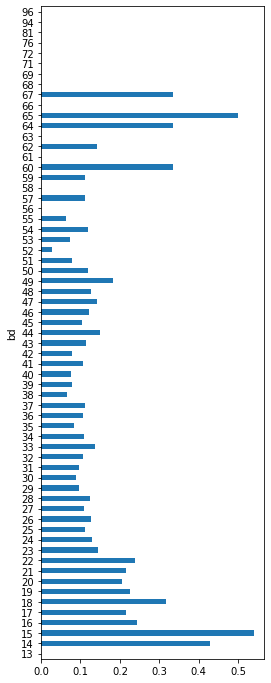

In [97]:
age_vs_churn = pd.merge(members_df, churn_df, on = 'msno', how = 'inner')
age_vs_churn = age_vs_churn[(age_vs_churn['bd'] < 100) & (age_vs_churn['bd'] > 12)]
age_vs_churn.groupby('bd')['is_churn'].mean().plot(kind = 'barh',
                                                   figsize = (4,12))

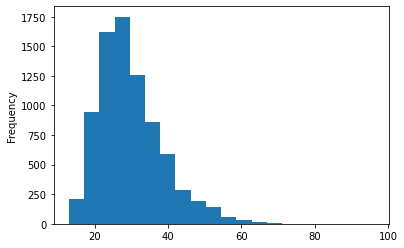

In [105]:
age_vs_churn['bd'].plot.hist(bins = 20) #most users in late teens to late thirties

In [106]:
transact_df['plan_list_price'][transact_df['plan_list_price'] == 0]

43       0
219      0
350      0
463      0
550      0
        ..
21744    0
22199    0
22381    0
22567    0
22961    0
Name: plan_list_price, Length: 115, dtype: int64

# USING MERGED DATA

In [115]:
Data = pd.read_csv('Data.csv')

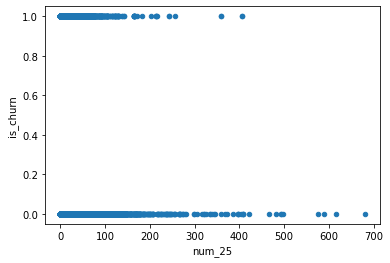

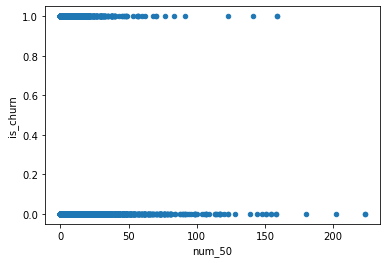

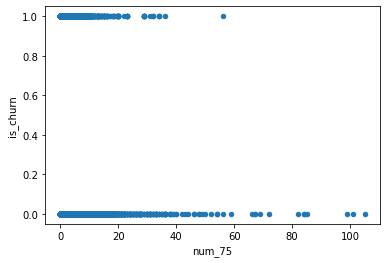

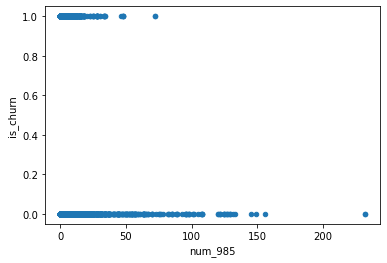

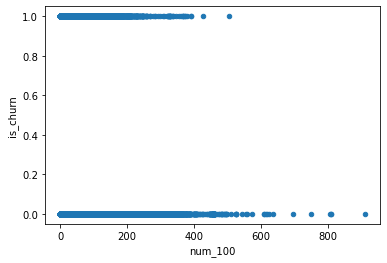

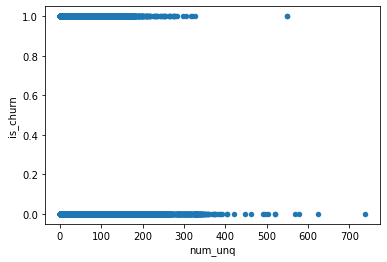

In [116]:
for x in ['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq']:
    Data.plot(kind = 'scatter', x = x, y = 'is_churn')
    
#users who listen to songs longer are less likely to churn?

In [126]:
listens_df = Data[['num_25', 'num_50', 'num_75', 'num_985', 'num_100']].copy()
plays_majority = pd.Series([])
for index in Data.index:
    listens = [(col, listens_df.loc[index, col]) for col in listens_df.columns]
    listens = sorted(listens, key = lambda x: x[1])
    plays_majority[index] = listens[0][0]

<ipython-input-126-8dcac83333f2>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  plays_majority = pd.Series([])


In [128]:
Data['plays_majority'] = plays_majority

In [129]:
Data.groupby(plays_majority)['is_churn'].mean()

num_100    0.080732
num_25     0.082830
num_50     0.088595
num_75     0.096392
num_985    0.097655
Name: is_churn, dtype: float64

In [130]:
plays_majority.value_counts()

num_50     121688
num_25      96547
num_75      75546
num_985     41237
num_100       929
dtype: int64

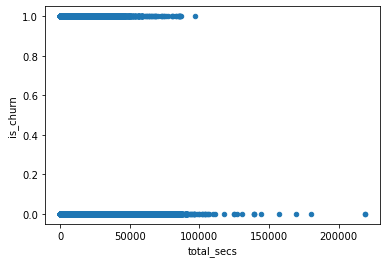

In [132]:
Data.plot.scatter(x = 'total_secs', y = 'is_churn')

(13.0, 99.0)

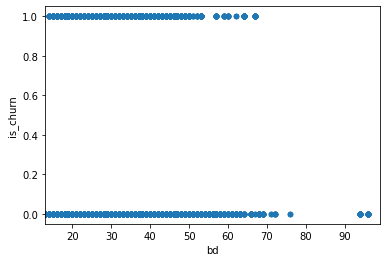

In [136]:
Data.plot.scatter(x = 'bd', y = 'is_churn')
plt.xlim(13,99)

In [137]:
Data.groupby('is_cancel')['is_churn'].mean()

#people who have canceled are, unsurprisingly, 4x more likely to churn

is_cancel
0    0.084370
1    0.343154
Name: is_churn, dtype: float64

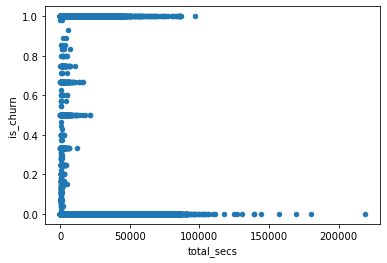

In [141]:
Data.groupby('total_secs')['is_churn'].mean().reset_index().plot.scatter(x = 'total_secs', y = 'is_churn')

In [142]:
col_list = ['registration_init_time', 'transaction_date',
            'membership_expire_date', 'date']

In [143]:
for name in col_list:
    Data[name] = pd.to_datetime(df[col],format='%Y%m%d')

In [153]:
print(members_df['registration_init_time'].min(), members_df['registration_init_time'].max())

2004-03-26 00:00:00 2017-03-24 00:00:00


In [157]:
Data.groupby('registered_via')['is_churn'].agg(['size', 'mean'])

,size,mean
registered_via,,
3,49515,0.126386
4,22359,0.177110
7,158292,0.052593
9,104585,0.111096
13,1196,0.000000


In [163]:
Data['age_bin'] = (5 + Data['bd'].copy()).round(-1)

In [167]:
Data_binned = Data[Data['age_bin'].isin(np.arange(2,11)*10)].copy()

In [173]:
xx = Data_binned.groupby(['age_bin', 'is_auto_renew'])[['is_churn']].agg(['size', 'mean'])

In [188]:
xx = xx.reset_index()
xx.columns = ['age_bin', 'is_auto_renew', 'size', 'churn_likelihood']

In [190]:
xx

,age_bin,is_auto_renew,size,churn_likelihood
0,20,0,9771,0.350834
1,20,1,9932,0.060411
2,30,0,14118,0.365987
3,30,1,75677,0.059120
4,40,0,3857,0.471869
5,40,1,49563,0.063959
6,50,0,791,0.651075
7,50,1,11848,0.069970
8,60,0,225,0.337778
9,60,1,4294,0.019096


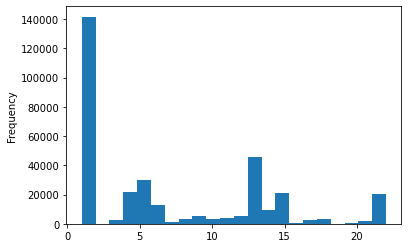

In [197]:
Data['city'].plot.hist(bins = 22)

In [233]:
1-Data.groupby('city')['is_churn'].mean().sort_values(ascending = True)

#percentage who have not churned in last pay period by city

city
20    1.000000
16    1.000000
7     0.985523
3     0.937179
17    0.932878
10    0.931295
1     0.931238
15    0.924838
8     0.915286
22    0.913448
14    0.908443
4     0.903877
11    0.898126
13    0.889217
6     0.882565
5     0.882158
21    0.879444
12    0.850913
18    0.840099
9     0.764275
Name: is_churn, dtype: float64

In [209]:
pct = Data.groupby('city')['is_churn'].mean() #percent that churn by city
raw = Data.groupby('city')['is_churn'].size() #number in each city

In [210]:
(pct*raw).sort_values(ascending = False)

city
1     9740.0
13    5028.0
5     3517.0
4     2090.0
22    1741.0
15    1592.0
6     1531.0
9     1222.0
14     848.0
12     776.0
18     579.0
11     435.0
8      271.0
21     234.0
10     209.0
17     177.0
3      159.0
7       13.0
16       0.0
20       0.0
Name: is_churn, dtype: float64

In [211]:
((1-pct)*raw).sort_values(ascending = False) #number of return customers by city

city
1     131907.0
13     40358.0
5      26328.0
4      19653.0
15     19589.0
22     18374.0
6      11506.0
14      8414.0
12      4429.0
9       3962.0
11      3835.0
18      3042.0
8       2928.0
10      2833.0
17      2460.0
3       2372.0
21      1707.0
7        885.0
20       801.0
16       402.0
Name: is_churn, dtype: float64

In [239]:
Data_binned.groupby('city')['bd'].agg(['size', 'mean']).sort_values(by = 'size', ascending = False)

,size,mean
city,,
13,40908,30.061651
5,27058,30.735346
4,19713,27.984173
15,18842,28.687878
22,18341,29.023336
6,11312,29.339905
14,8485,30.187861
1,5211,27.170984
12,4716,27.126378


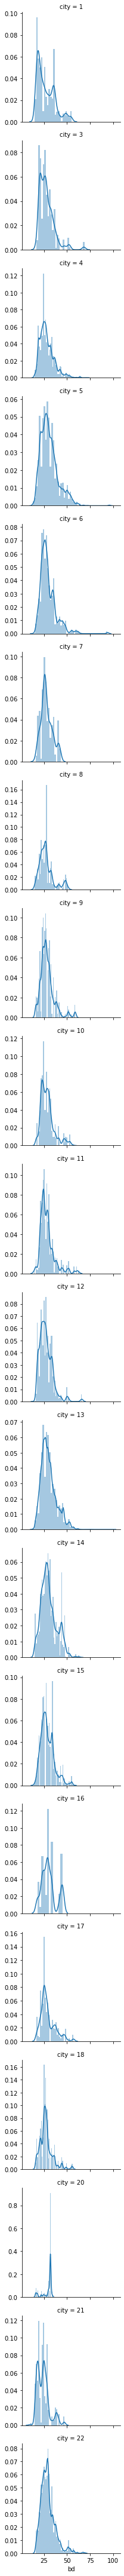

In [235]:
import seaborn as sns

sns.FacetGrid(Data_binned, row = 'city', sharey = False).map(sns.distplot, 'bd')

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,plays_majority,age_bin
0,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-18,39,30,149,...,2017-03-18,0,1,0,0,38,39,9616.313,num_25,30
1,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-18,39,30,149,...,2017-03-18,3,1,0,0,26,27,5963.866,num_75,30
2,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-13,39,30,149,...,2017-03-13,0,0,0,0,4,4,978.785,num_25,30
3,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-26,39,30,149,...,2017-03-26,1,1,0,0,30,32,7583.396,num_75,30
4,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-27,39,30,149,...,2017-03-27,0,0,1,1,20,22,4885.992,num_25,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335917,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,0,13,33,male,3,NaT,39,30,149,...,NaT,11,1,1,2,40,42,11368.180,num_50,40
335918,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,0,13,33,male,3,NaT,39,30,149,...,NaT,4,1,1,1,35,39,9240.199,num_50,40
335919,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,0,13,33,male,3,NaT,39,30,149,...,NaT,0,0,1,0,6,5,1675.688,num_25,40
335920,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,0,13,33,male,3,NaT,39,30,149,...,NaT,2,0,0,0,13,15,3381.208,num_50,40


In [231]:
Data_binned.groupby('city')['bd'].agg(['mean', 'size'])

,mean,size
city,,
1,27.170984,5211
3,27.880000,2225
4,27.984173,19713
5,30.735346,27058
6,29.339905,11312
7,27.995068,811
8,27.427012,2932
9,28.448401,4690
10,28.568736,2706


In [241]:
Data['bd'].value_counts()

 0      155071
 27      11993
 25      11862
 26      10645
 29      10270
         ...  
 76          4
 71          4
-46          4
 4           3
 100         2
Name: bd, Length: 72, dtype: int64

In [244]:
Data['bd'][Data['bd'] == 0].shape[0]/Data.shape[0] #percent of age column consisting of zeros

0.46159364423554905

In [248]:
freeplan = Data_binned[Data_binned['plan_list_price'] == 0].copy()

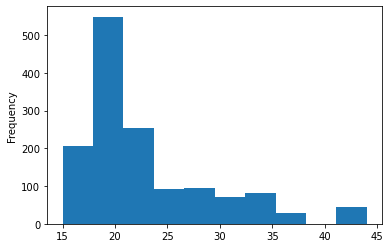

In [251]:
freeplan['bd'].plot.hist(bins = 10)

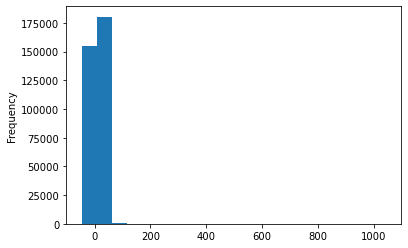

In [287]:
Data['bd'].plot.hist(bins = 20)

In [255]:
noage = Data[Data['bd'] == 0].copy()

In [270]:
cities_noage = noage['city'].value_counts()
cities_noage[16] = 0

In [271]:
all_cities = Data['city'].value_counts()

In [280]:
cities_noage.sort_index() / all_cities.sort_index() #percentage in each city with age == 0

1     0.962837
3     0.120901
4     0.092995
5     0.093382
6     0.130168
7     0.096882
8     0.083464
9     0.092593
10    0.110454
11    0.092037
12    0.082805
13    0.098092
14    0.082056
15    0.110429
16    0.000000
17    0.050436
18    0.078984
20    0.024969
21    0.060793
22    0.088193
Name: city, dtype: float64

In [293]:
too_old = Data[Data['bd'] > 100].copy()
too_old['city'].value_counts()

12    58
1     53
18    28
6     28
13    19
14    17
9     14
4      8
Name: city, dtype: int64

In [297]:
Data.groupby('msno')[['bd', 'is_churn']].agg({'bd': 'size', 'is_churn': 'mean'})

,bd,is_churn
msno,,
++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,1,0
++UGC5bVrIbJWXS5Q4B6Xxoj/yUsduvLdPSZx4tqcGk=,27,0
++iFlaLw8PeR7GRlbKuTokdmegjwPUWj5C5b/aVklGI=,10,0
+/9ci+EwK9CTIVyylTybN8jPWJy3ZE5EEmb2h7RD+6Q=,27,0
+/SqDTZQgXt/WkmxQjlswLC1KAEVGTBkC/GUUVyk82c=,28,0
...,...,...
zyj/VIiRzkuRc1T5rMA2Kyvz2vv6sCrIOZVhDrwjov0=,7,0
zyktV9jTr8Uxnn6QkvoLFMhmWhX61GJQNts6b/zXXJY=,25,0
zz0VZdYTSzZdk/GOtC95vwIXIv47phw+QDMpKhmBJps=,31,0


In [298]:
Data

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,...,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,plays_majority,age_bin
0,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-18,39,30,149,...,2017-03-18,0,1,0,0,38,39,9616.313,num_25,30
1,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-18,39,30,149,...,2017-03-18,3,1,0,0,26,27,5963.866,num_75,30
2,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-13,39,30,149,...,2017-03-13,0,0,0,0,4,4,978.785,num_25,30
3,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-26,39,30,149,...,2017-03-26,1,1,0,0,30,32,7583.396,num_75,30
4,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2017-03-27,39,30,149,...,2017-03-27,0,0,1,1,20,22,4885.992,num_25,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335942,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,0,NaN,7,NaT,41,30,99,...,NaT,2,1,0,1,120,91,29044.905,num_75,0
335943,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,0,NaN,7,NaT,41,30,99,...,NaT,0,0,0,0,18,18,4393.758,num_25,0
335944,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,0,NaN,7,NaT,41,30,99,...,NaT,1,0,0,0,51,51,11871.336,num_50,0
335945,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,0,NaN,7,NaT,41,30,99,...,NaT,3,3,0,0,48,44,12274.770,num_75,0


In [305]:
members_df

,msno,city,bd,gender,registered_via,registration_init_time
0,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,2011-09-16
1,oQCja0OLsoCRoltknOOcdk99Eb+GzOU3ck9Rkhk8ixY=,1,0,NaN,7,2017-01-01
2,14UsNUmAV8hPhH20iItmTwdj4WuPdSgl+IFxxYv2UAs=,13,26,female,9,2006-09-04
3,U1sC/tbHj1wxzTlS1MSkkNebBe+1Tl1D7EQD2a1eohU=,4,28,female,9,2006-11-07
4,UlMtrW+Fd1orwHKvujHcuLE7al80WF4Bw8C9ypL19HA=,13,35,female,9,2006-11-20
...,...,...,...,...,...,...
17655,rB0Xsoh07jDrTZYNBBZwJfohCbt8rZA2qr6C2UmZQ0M=,3,0,NaN,7,2013-06-05
17656,/UJQmfkhYQeMvO5G29WHlR7HP6bHGQUzKUecaEJr+Yc=,1,0,NaN,7,2014-06-14
17657,005gP05abJe/rU/o/FDkewNAeH6CpgQgoXt9GZlb3rw=,15,25,male,9,2005-08-10
17658,l9Z9pxGTeBjkpKpMDwIBeH4+Zya81Zg2x/WX+0nWiEo=,21,33,male,9,2009-03-24


In [312]:
Data.groupby('registered_via')[['is_churn', 'bd']].agg({'is_churn': 'size', 'is_churn': 'mean', 'bd': 'mean'})

,is_churn,bd
registered_via,,
3,0.126386,22.634272
4,0.177110,13.789033
7,0.052593,7.015762
9,0.111096,26.470918
13,0.000000,3.708194


In [321]:
Data.groupby('payment_method_id')['is_churn'].agg(['size', 'mean']).sort_values(by = 'mean', ascending = False)

,size,mean
payment_method_id,,
12,84,1.000000
13,60,1.000000
26,49,1.000000
22,137,1.000000
20,423,1.000000
17,572,0.973776
35,498,0.963855
15,873,0.958763
32,4172,0.958054


In [317]:
for x in Data['registered_via'].unique():
    print(x, ':')
    print(Data[Data['registered_via'] == x].groupby('city').size())
    print('-'*100)
    
# people in city 1 frequently register via methods 3, 7, and 13

9 :
city
1      7912
3      1120
4     10003
5     15740
6      5938
7       483
8      1543
9      2630
10     1346
11     2517
12     2241
13    24162
14     4428
15    10139
16      250
17     1283
18     1960
20      173
21      968
22     9749
dtype: int64
----------------------------------------------------------------------------------------------------
7 :
city
1     119338
3        603
4       5038
5       6149
6       2324
7        199
8        767
9       1178
10       918
11       494
12      1046
13      7993
14      2398
15      3855
16        53
17       427
18       951
20       550
21       488
22      3523
dtype: int64
----------------------------------------------------------------------------------------------------
4 :
city
1     8462
3      354
4     1835
5     1866
6      875
7       30
8      226
9      472
10     210
11     242
12     507
13    2920
14     326
15    1629
16      18
17     161
18     182
20      31
21     327
22    1686
dtype: int64
------------

In [319]:
for x in Data['payment_method_id'].unique():
    print(x, ':')
    print(Data[Data['payment_method_id'] == x].groupby('city').size())
    print('-'*100)
    
# people in city 1 overwhelmingly use payment method 41, which as a very low churn rate

39 :
city
1        14
3       620
4      4110
5      5666
6      3943
7       176
8       600
9      1215
10      752
11     1876
12      898
13    11065
14     2726
15     7614
16       58
17      792
18     1100
21      244
22     5389
dtype: int64
----------------------------------------------------------------------------------------------------
41 :
city
1     117531
3        383
4       4367
5       5357
6       1842
7        199
8        513
9       1006
10       733
11       421
12       767
13      6595
14      2004
15      3336
16        53
17       374
18       677
20       540
21       329
22      2952
dtype: int64
----------------------------------------------------------------------------------------------------
40 :
city
1       19
3      279
4     3105
5     5145
6     1921
7      131
8      332
9      649
10     373
11     689
12     670
13    7892
14    1370
15    2716
16      73
17     366
18     447
20      19
21     194
22    2737
dtype: int64
---------------------

In [322]:
Data2 = pd.read_csv('data_imp.csv')

In [323]:
Data2.groupby('city')['bd'].mean()

city
1     29.317621
3     27.953773
4     28.141931
5     30.593768
6     29.521516
7     28.035635
8     27.635824
9     28.793403
10    28.645628
11    28.601639
12    28.291066
13    30.006478
14    31.998165
15    28.749351
16    30.308458
17    29.095942
18    28.177299
20    29.136080
21    24.391551
22    29.037832
Name: bd, dtype: float64

In [325]:
def generation(x):
    if x < 21:
        return 'genz'
    elif x < 38:
        return 'millennial'
    elif x < 53:
        return 'genx'
    else:
        return 'boomer'

In [328]:
Data2['gen'] = Data2['bd'].copy().apply(generation)

In [332]:
Data2.groupby('gen').agg({'is_churn': ['mean', 'size']})

is_churn        
                mean    size
gen                         
boomer      0.060708    5963
genx        0.076487   40961
genz        0.138515   36819
millennial  0.085514  252204

In [342]:
ex1 = Data2[Data2['city'] == 1].groupby('gen').agg({'is_churn': ['mean', 'size']}).reset_index()
ex1.columns = ['generation', 'mean_churn', 'size']
ex1['size'] = ex1['size'] / Data2.shape[0]
ex1

,generation,mean_churn,size
0,boomer,0.056854,0.007644
1,genx,0.063264,0.050910
2,genz,0.105135,0.050085
3,millennial,0.064127,0.312996


In [341]:
ex2 = Data2[Data2['city'] != 1].groupby('gen').agg({'is_churn': ['mean', 'size']}).reset_index()
ex2.columns = ['generation', 'mean_churn', 'size']
ex2['size'] = ex2['size'] / Data2.shape[0]
ex2

,generation,mean_churn,size
0,boomer,0.063623,0.010106
1,genx,0.085967,0.071017
2,genz,0.166608,0.059512
3,millennial,0.100807,0.437730


In [352]:
ex3 = Data2.groupby('city').agg({'is_churn': ['size', 'mean']}).reset_index()
ex3.columns = ['city', 'num_users', 'churn_rate']

In [474]:
ex3.sort_values(by = 'churn_rate').sort_values(by = 'num_users')
#important markets: 1, 15, 22, 4, 13, 5

,city,num_users,churn_rate
14,16,402,0.000000
17,20,801,0.000000
5,7,898,0.014477
18,21,1941,0.120556
1,3,2531,0.062821
15,17,2637,0.067122
8,10,3042,0.068705
6,8,3199,0.084714
16,18,3621,0.159901
9,11,4270,0.101874


### Segments

- high/low population
- payments methods
- registered_via
- adults/minors/seniors

In [355]:
Data2

,Unnamed: 0,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,...,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,gen
0,0,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,0,20170303,0,1,0,0,38,39,9616.313,millennial
1,1,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,0,20170322,3,1,0,0,26,27,5963.866,millennial
2,2,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,0,20170307,0,0,0,0,4,4,978.785,millennial
3,3,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,0,20170323,1,1,0,0,30,32,7583.396,millennial
4,4,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,0,20170315,0,0,1,1,20,22,4885.992,millennial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335942,335942,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,28,NaN,7,20170209,41,30,...,0,20170330,2,1,0,1,120,91,29044.905,millennial
335943,335943,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,21,NaN,7,20170209,41,30,...,0,20170328,0,0,0,0,18,18,4393.758,millennial
335944,335944,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,22,NaN,7,20170209,41,30,...,0,20170301,1,0,0,0,51,51,11871.336,millennial
335945,335945,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,27,NaN,7,20170209,41,30,...,0,20170310,3,3,0,0,48,44,12274.770,millennial


In [364]:
Data2[Data2.bd < 16].shape[0] / Data2.shape[0]

0.002903899991353891

In [367]:
Data3 = Data2[Data2.bd >= 13].copy()

In [499]:
Data3.to_csv('./visualizations/Data3.csv')

In [372]:
hi_pops = [1, 15, 22, 4, 13, 5]

Data3['pop'] = np.where(Data3['city'].isin(hi_pops), 'high', 'low')

Data3 ###### THIS IS THE DATAFRAME I'M BASING THINGS ON ######

,Unnamed: 0,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,...,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,gen,pop
0,0,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,20170303,0,1,0,0,38,39,9616.313,millennial,high
1,1,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,20170322,3,1,0,0,26,27,5963.866,millennial,high
2,2,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,20170307,0,0,0,0,4,4,978.785,millennial,high
3,3,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,20170323,1,1,0,0,30,32,7583.396,millennial,high
4,4,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,20170315,0,0,1,1,20,22,4885.992,millennial,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335942,335942,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,28,NaN,7,20170209,41,30,...,20170330,2,1,0,1,120,91,29044.905,millennial,high
335943,335943,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,21,NaN,7,20170209,41,30,...,20170328,0,0,0,0,18,18,4393.758,millennial,high
335944,335944,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,22,NaN,7,20170209,41,30,...,20170301,1,0,0,0,51,51,11871.336,millennial,high
335945,335945,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,27,NaN,7,20170209,41,30,...,20170310,3,3,0,0,48,44,12274.770,millennial,high


In [375]:
segment_df = Data3.groupby(['pop', 'payment_method_id', 'gen', 'registered_via']).agg({'is_churn': ['mean', 'count']}).reset_index()

In [379]:
segment_df.columns = ['population', 'payment_method', 'generation', 'registration_method', 'churn_rate', 'count']

In [380]:
segment_df

,population,payment_method,generation,registration_method,churn_rate,count
0,high,10,millennial,9,0.000000,13
1,high,11,genx,9,0.000000,20
2,high,12,genz,3,1.000000,54
3,high,13,boomer,9,1.000000,2
4,high,13,genx,9,1.000000,5
...,...,...,...,...,...,...
456,low,41,boomer,7,0.000000,90
457,low,41,genx,7,0.164038,1585
458,low,41,genz,7,0.000000,1115
459,low,41,genz,9,0.000000,16


In [383]:
segment_df[segment_df['count'] > 1000].sort_values(by = 'churn_rate', ascending = False)

,population,payment_method,generation,registration_method,churn_rate,count
149,high,32,millennial,9,0.935459,1286
228,high,38,millennial,9,0.382038,5222
423,low,38,millennial,9,0.379247,1089
226,high,38,millennial,4,0.260008,2523
221,high,38,genz,3,0.234534,2554
222,high,38,genz,4,0.231343,1072
225,high,38,millennial,3,0.227829,3349
224,high,38,genz,9,0.182083,1719
457,low,41,genx,7,0.164038,1585
188,high,36,genz,3,0.146051,1342


In [385]:
Data3.groupby('pop').agg({'is_churn': ['size', 'mean']})

#more customers in high-pop areas
#high pop areas have lower churn rate

is_churn          
         size      mean
pop                    
high   279547  0.084741
low     55842  0.115307

In [387]:
xxxx = Data3.groupby(['pop', 'payment_method_id']).agg({'is_churn': 'size'})

sns.FacetGrid(xxxx, row = 'pop', sharey = False).map(sns.barplot)

#high pop area more likely to use payment method 41, while low pop area more likely to use payment method 39

is_churn
pop  payment_method_id          
high 10                       13
     11                       20
     12                       54
     13                       42
     14                      194
     15                      666
     16                      393
     17                      455
     18                      172
     19                      160
     20                      423
     21                      499
     22                      110
     23                      517
     26                       23
     27                      582
     28                      658
     29                     5653
     30                     4652
     31                     2614
     32                     3125
     33                     2904
     34                     6052
     35                      331
     36                    25021
     37                    10591
     38                    18228
     39                    33853
     40                    21594
     41                   139948
low  11                       14
     12                       30
     13                       18
     14                       80
     15                      207
     16                      136
     17                      117
     19                      275
     21                      290
     22                       27
     23                      123
     26                       26
     27                      102
     28                      330
     29                     1724
     30                      675
     31                     1061
     32                     1031
     33                     1251
     34                     3034
     35                      167
     36                     5456
     37                     3198
     38                     4148
     39                    14996
     40                     7485
     41                     9841

In [469]:
top_pm = seg_df.groupby('payment_method_id').size().sort_values(ascending = False).index[:12]

In [400]:
churn_by_pmt = Data3.groupby('payment_method_id').agg({'is_churn': ['mean', 'count']}).reset_index()
churn_by_pmt.columns = ['payment', 'churn_rate', 'count']
toplot1 = churn_by_pmt.sort_values(by = 'count', ascending = False).iloc[:12,]

Text(0, 0.5, 'Count')

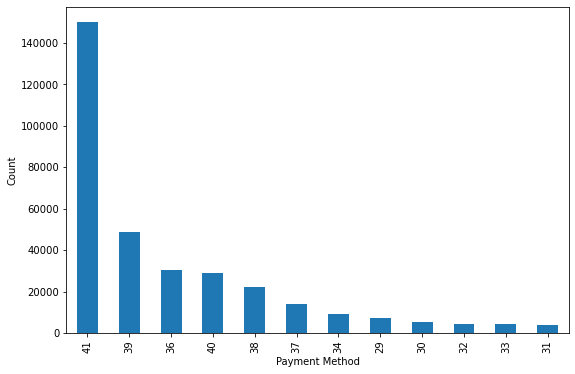

In [489]:
toplot1.plot.bar(x = 'payment', y = 'count', figsize = (9,6)).legend().remove()
plt.xlabel('Payment Method')
plt.ylabel('Count')
# Top 12 payment methods

In [472]:
churn_by_pmt_sorted = churn_by_pmt[churn_by_pmt['payment'].isin(top_pm)].sort_values(by = 'churn_rate')

Text(0, 0.5, 'Churn Rate')

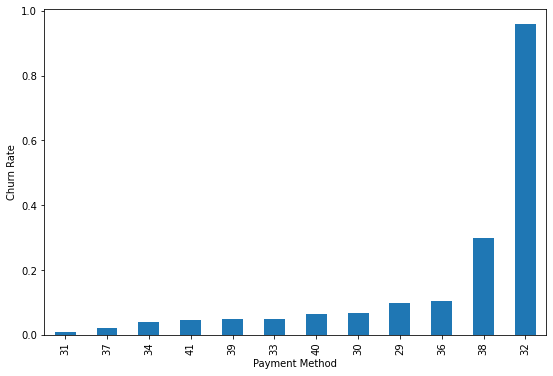

In [488]:
churn_by_pmt_sorted.plot.bar(x = 'payment', y = 'churn_rate', figsize = (9,6)).legend().remove()
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
# Churn rates of top 12 payment methods

In [406]:
churn_by_reg = Data3.groupby('registered_via').agg({'is_churn': ['mean', 'count']}).reset_index()
churn_by_reg.columns = ['registration', 'churn_rate', 'count']
toplot2 = churn_by_reg.sort_values(by = 'count', ascending = False)

Text(0, 0.5, 'Count')

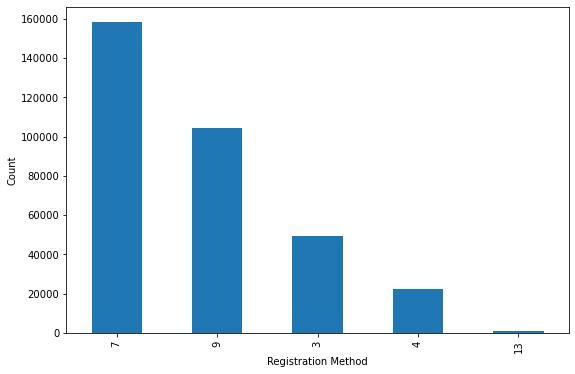

In [491]:
toplot2.plot.bar(x = 'registration', y = 'count', figsize = (9,6)).legend().remove()
plt.xlabel('Registration Method')
plt.ylabel('Count')
#7 the most common payment method, 13 negligible

Text(0, 0.5, 'Churn Rate')

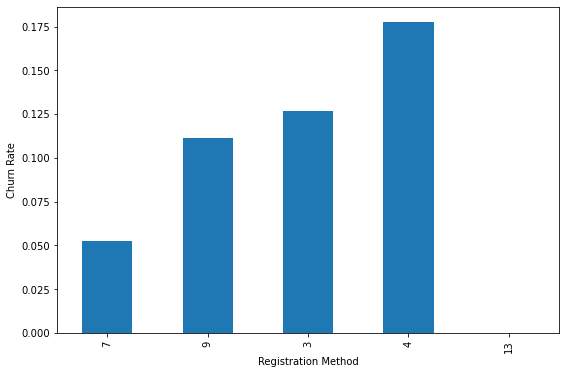

In [490]:
toplot2.plot.bar(x = 'registration', y = 'churn_rate', figsize = (9,6)).legend().remove()
plt.xlabel('Registration Method')
plt.ylabel('Churn Rate')

# payment method 7 has lowest churn rate among non-negligible payment methods

In [409]:
# We want to market to CITIES and AGE GROUPS that use payment
# and registration methods that 1. are common and 2. have low churn rates.

In [417]:
def mode_(x):
    return x.value_counts().index[0]

In [429]:
toplot3 = Data3.groupby(['pop', 'gen']).agg({'payment_method_id': mode_, 'registered_via': mode_}).reset_index()

In [428]:
Data3.groupby(['city', 'gen']).size().reset_index().sort_values(by = 0, ascending = False).iloc[:10,]

# largest demographic

,city,gen,0
3,1,millennial,105150
46,13,millennial,33719
15,5,millennial,21261
1,1,genx,17103
54,15,millennial,16912
2,1,genz,16817
11,4,millennial,16219
77,22,millennial,15792
19,6,millennial,10241
44,13,genx,6914


In [433]:
seg_df = Data3[['pop', 'gen', 'payment_method_id', 'registered_via']]
seg_df

,pop,gen,payment_method_id,registered_via
0,high,millennial,39,9
1,high,millennial,39,9
2,high,millennial,39,9
3,high,millennial,39,9
4,high,millennial,39,9
...,...,...,...,...
335942,high,millennial,41,7
335943,high,millennial,41,7
335944,high,millennial,41,7
335945,high,millennial,41,7


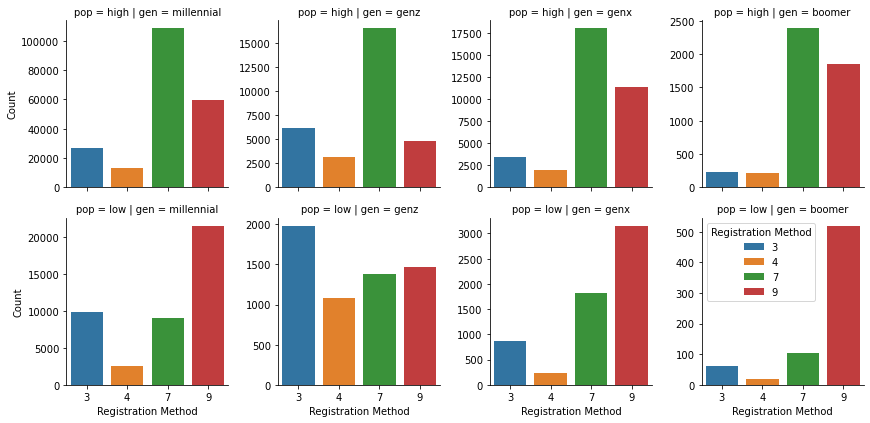

In [498]:
grid = sns.FacetGrid(data = seg_df, row = 'pop', col = 'gen', sharey = False, hue = 'registered_via')
grid.map(sns.countplot, 'registered_via', order = [3, 4, 7, 9])
plt.legend(title = "Registration Method")
grid.set_axis_labels("Registration Method", "Count")

# In high population areas, every age group uses payment method 7 most frequently.
# Payment method 7 has the lowest churn rate

# In low population areas, payment method 9 is most common in every age group except for gen-z, where 7 is most common.
# Churn rate for payment method 9 is the second lowest, but still more than 2x that of method 7.

In [454]:
df_trunc#= seg_df[seg_df.payment_method_id.isin(top_pm)]

,pop,gen,payment_method_id,registered_via
0,high,millennial,39,9
1,high,millennial,39,9
2,high,millennial,39,9
3,high,millennial,39,9
4,high,millennial,39,9
...,...,...,...,...
335942,high,millennial,41,7
335943,high,millennial,41,7
335944,high,millennial,41,7
335945,high,millennial,41,7


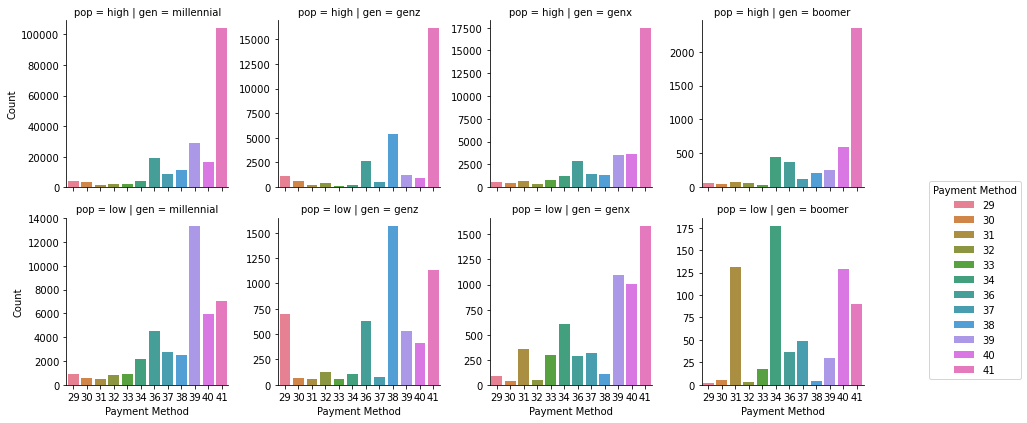

In [497]:
grid2 = sns.FacetGrid(data = df_trunc, row = 'pop', col = 'gen', sharey = False, hue = 'payment_method_id')
grid2.map(sns.countplot, 'payment_method_id', order = top_pm.sort_values())
plt.legend(title = "Payment Method", bbox_to_anchor=(2,1.25))
grid2.set_axis_labels("Payment Method", "Count")

In [455]:
# Looking for combination of
    # large segment
    # payment method with low churn rate
    # registration method with low churn rate

# What segments achieve this?
    # All high population users: PM 41 and RM 7 most common.
        # PM 41 has quite low churn rate (4th lowest), RM 7 has lowest churn rate
        # Millennials by far largest subset
    # Low pop millennials:
        # Not much difference in churn rate for PM (most common here is 39),
         # significant increase in churn rate for RM (9)
        # Again, by far the largest segment of customer base
    # Low pop genz:
        # RM 3 relatively high churn, PM 38 quite high churn.
    # Low pop genx:
        # top 3 RM (39, 40, 41) are all relatively low, RM (9) has high churn rate
    # Low pop boomer:
        # Very small segment of customer base
        # PM churn rates are very low
        # Overwhelmingly register via method 9, which has high churn rate
        
# I would recommend marketing to millennials and gen-z in high-population areas, particularly gen-z. indications are
# that they could become long-term customers.

Int64Index([29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41], dtype='int64', name='payment_method_id')

In [500]:
Data3

,Unnamed: 0,msno,is_churn,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,...,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,gen,pop
0,0,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,20170303,0,1,0,0,38,39,9616.313,millennial,high
1,1,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,20170322,3,1,0,0,26,27,5963.866,millennial,high
2,2,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,20170307,0,0,0,0,4,4,978.785,millennial,high
3,3,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,20170323,1,1,0,0,30,32,7583.396,millennial,high
4,4,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,20080821,39,30,...,20170315,0,0,1,1,20,22,4885.992,millennial,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335942,335942,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,28,NaN,7,20170209,41,30,...,20170330,2,1,0,1,120,91,29044.905,millennial,high
335943,335943,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,21,NaN,7,20170209,41,30,...,20170328,0,0,0,0,18,18,4393.758,millennial,high
335944,335944,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,22,NaN,7,20170209,41,30,...,20170301,1,0,0,0,51,51,11871.336,millennial,high
335945,335945,JmSnHrYQsnyVG3v8wrPHHzOZsn91or/7tPdjdHX5EG0=,0,1,27,NaN,7,20170209,41,30,...,20170310,3,3,0,0,48,44,12274.770,millennial,high


In [504]:
335389/5

67077.8

In [511]:
for i in range(0,5):
    split = Data3.iloc[70000*i:70000*(i+1)]
    split.to_csv('Data_pt' + str(i) + '.csv')

[1, 2]

[3, 4]